# Online Shoppers Intention

**Problem Statement:**

Based on given data of visitors browsing for online shopping, build different clusters to know whether person is only browsing and visiting multiples pages or also generating revenue for the shoppers as well.  Analyse and compare the clusters formed with the existing Revenue Column.

**Attribute Information:**
    
The dataset consists of 10 numerical and 8 categorical attributes.
The 'Revenue' attribute can be used as the class label.

**Expected Approach/Outcomes:**

1. Perform required cleaning to bring the uniformity in the data.
2. Carry-out uni-variate, Bi-variate and Multti-varaiate analysis to understand the data relationships.
3. Perform required missing value treatment
4. Perform Outlier treatment if required
5. Perform appropriate scaling
6. Perform required encoding techniques
7. Build the different cluster models.
8. Analyse the optimum number of cluster using appropriate techniques.
9. Make the appropriate business interpretation using the cluster centroids.
10. Perform the EDA on cluster groups to understand the cluster characteristics.
11. Perform PCA and apply clustering on top of it. Comment whether PCA is really helping the clustering process.  
12. Also try different graphs to visualize the clusters and its characteristics. 

In [1496]:
import pandas as pd 

import numpy as np
from numpy.linalg import eig

import matplotlib.pyplot as plt
import matplotlib.cm as cm

import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')

pd.options.display.float_format = '{:.6f}'.format

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cophenet

plt.rcParams['figure.figsize'] = [15,8]

In [1497]:
df=pd.read_csv('online_shoppers_intention.csv')
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.000000,0,0.000000,1,0.000000,0.200000,0.200000,0.000000,0.000000,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.000000,0,0.000000,2,64.000000,0.000000,0.100000,0.000000,0.000000,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.000000,0,0.000000,1,0.000000,0.200000,0.200000,0.000000,0.000000,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.000000,0,0.000000,2,2.666667,0.050000,0.140000,0.000000,0.000000,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.000000,0,0.000000,10,627.500000,0.020000,0.050000,0.000000,0.000000,Feb,3,3,1,4,Returning_Visitor,True,False


In [1498]:
df.shape

(12330, 18)

In [1499]:
df.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [1500]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [1501]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [1502]:
df.describe(include=object)

,Month,VisitorType
count,12330,12330
unique,10,3
top,May,Returning_Visitor
freq,3364,10551


In [1503]:
df.describe(include=bool)

,Weekend,Revenue
count,12330,12330
unique,2,2
top,False,False
freq,9462,10422


In [1504]:
df.nunique()

Administrative               27
Administrative_Duration    3335
Informational                17
Informational_Duration     1258
ProductRelated              311
ProductRelated_Duration    9551
BounceRates                1872
ExitRates                  4777
PageValues                 2704
SpecialDay                    6
Month                        10
OperatingSystems              8
Browser                      13
Region                        9
TrafficType                  20
VisitorType                   3
Weekend                       2
Revenue                       2
dtype: int64

In [1505]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

### Uni-Variate Analysis of the Data

In [1506]:
df['Revenue'].value_counts()

False    10422
True      1908
Name: Revenue, dtype: int64

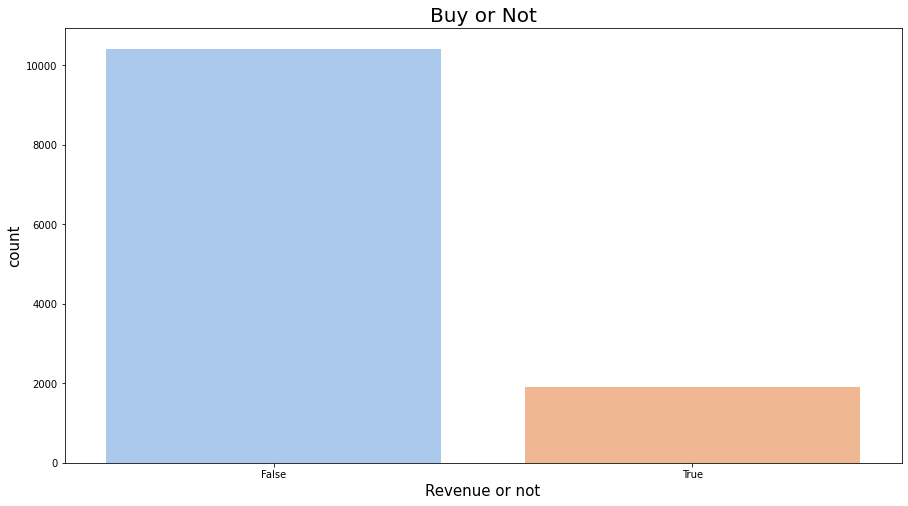

In [1507]:
# Checking the Distribution of customers on Revenue

sns.countplot(df['Revenue'], palette = 'pastel')
plt.title('Buy or Not', fontsize = 20)
plt.xlabel('Revenue or not', fontsize = 15)
plt.ylabel('count', fontsize = 15)
plt.show()

In [1508]:
df['Weekend'].value_counts()

False    9462
True     2868
Name: Weekend, dtype: int64

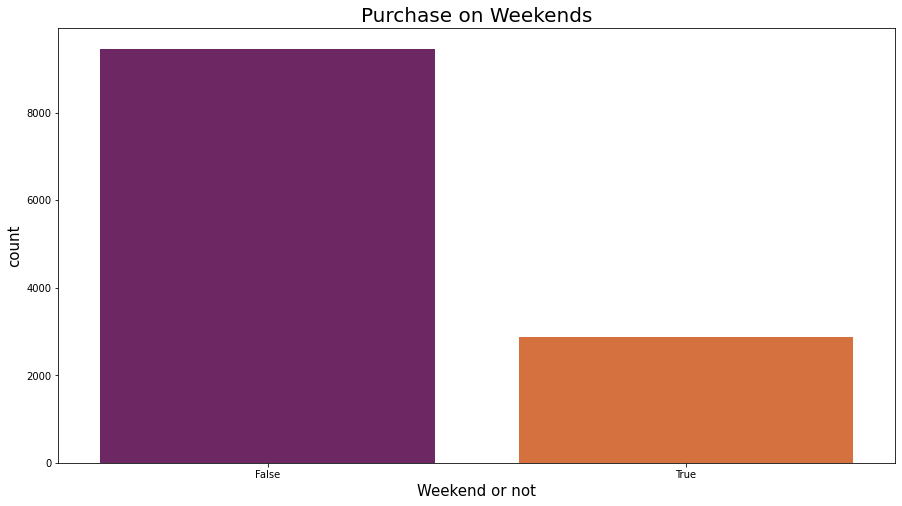

In [1509]:
# Checking the Distribution of customers on Weekend

sns.countplot(df['Weekend'], palette = 'inferno')
plt.title('Purchase on Weekends', fontsize = 20)
plt.xlabel('Weekend or not', fontsize = 15)
plt.ylabel('count', fontsize = 15)

plt.show()

In [1510]:
df['VisitorType'].value_counts()

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

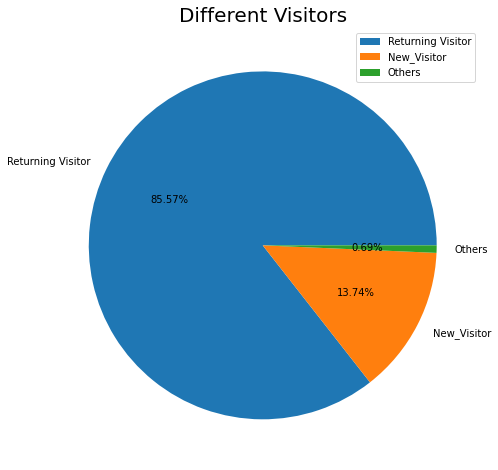

In [1511]:
# Plotting a pie chart for Visitors

size = [10551, 1694, 85]
labels = "Returning Visitor", "New_Visitor", "Others"
plt.pie(size, labels = labels, autopct = '%.2f%%')
plt.title('Different Visitors', fontsize = 20)
plt.legend()
plt.show()

In [1512]:
df['Month'].value_counts()

May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64

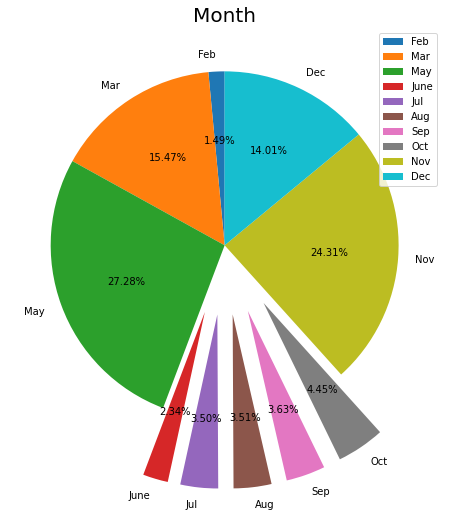

In [1513]:
# Plotting a pie chart for Months

size = [184, 1907, 3364, 288,432, 433, 448,549,2998,1727]
labels = 'Feb','Mar','May','June','Jul','Aug','Sep','Oct','Nov','Dec'
explode=[0,0,0,0.4,0.4,0.4,0.4,0.4,0,0]

plt.pie(size,labels = labels,explode=explode, autopct = '%.2f%%', startangle = 90)
plt.title('Month', fontsize = 20)
plt.legend()
plt.show()

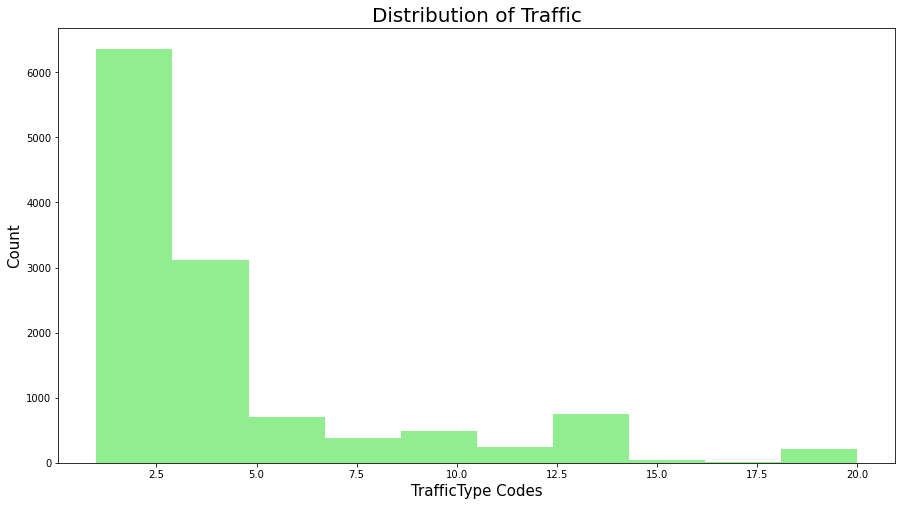

In [1514]:
# Visualizing the distribution of traffic around the Region

plt.hist(df['TrafficType'], color = 'lightgreen')
plt.title('Distribution of Traffic',fontsize = 20)
plt.xlabel('TrafficType Codes', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

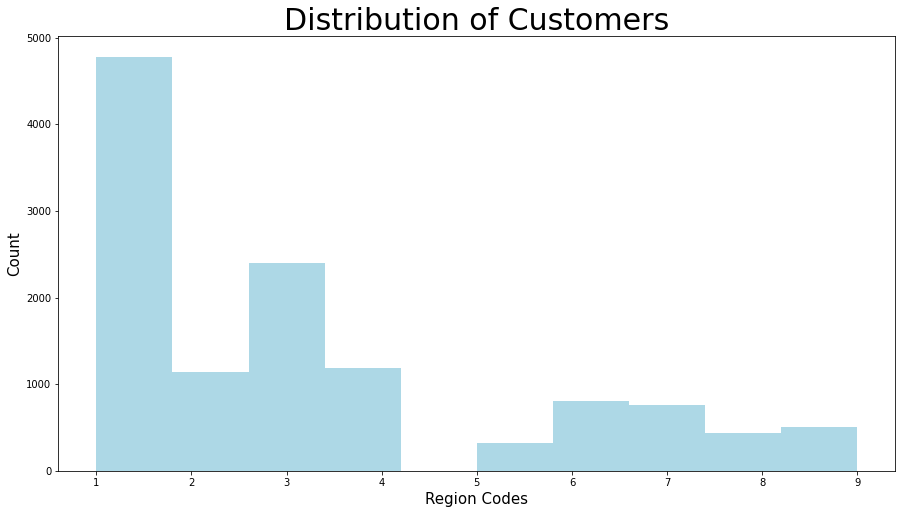

In [1515]:
# Visualizing the distribution of customers around the Region

plt.hist(df['Region'], color = 'lightblue')
plt.title('Distribution of Customers',fontsize = 30)
plt.xlabel('Region Codes', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

In [1516]:
df['OperatingSystems'].value_counts()

2    6601
1    2585
3    2555
4     478
8      79
6      19
7       7
5       6
Name: OperatingSystems, dtype: int64

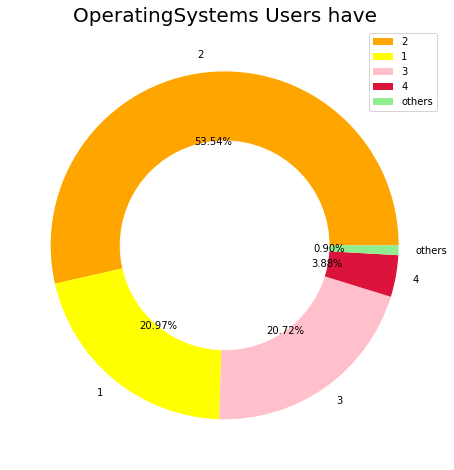

In [1517]:
# plotting a donut chart for different number of OperatingSystems users have.

size = [6601, 2585, 2555, 478, 111]
colors = ['orange', 'yellow', 'pink', 'crimson', 'lightgreen']
labels = "2", "1","3","4","others"
explode = [0, 0, 0, 0, 0]

circle = plt.Circle((0, 0), 0.6, color = 'white')

plt.pie(size, colors = colors, labels = labels, explode = explode, autopct = '%.2f%%')
plt.title('OperatingSystems Users have', fontsize = 20)
p = plt.gcf()
p.gca().add_artist(circle)
plt.legend()
plt.show()

### Bi-Variate Analysis

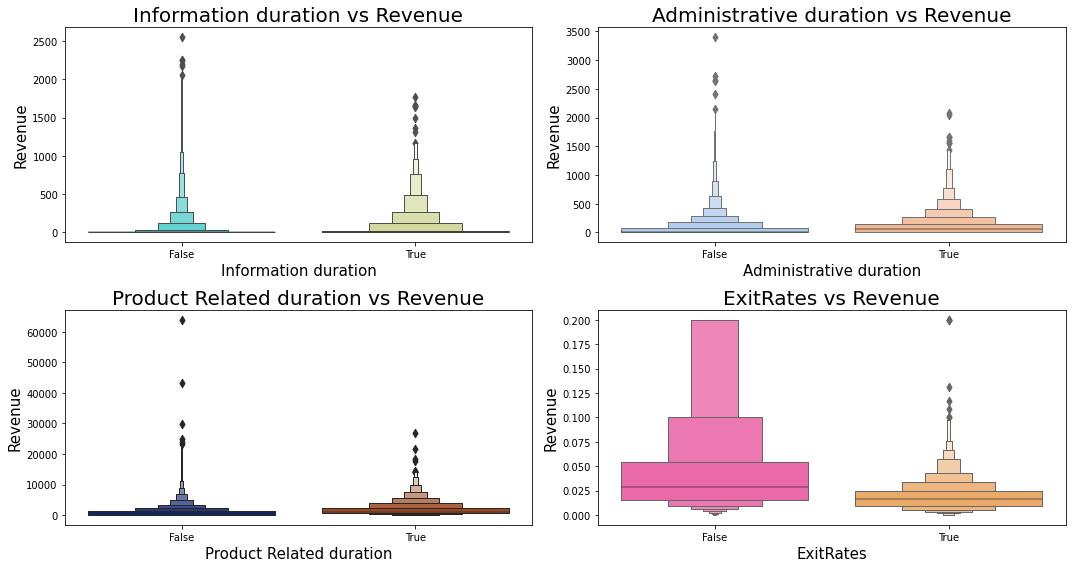

In [1518]:
# product related duration vs revenue

plt.subplot(2, 2, 1)
sns.boxenplot(df['Revenue'], df['Informational_Duration'], palette = 'rainbow')
plt.title('Information duration vs Revenue', fontsize = 20)
plt.xlabel('Information duration', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)

# product related duration vs revenue

plt.subplot(2, 2, 2)
sns.boxenplot(df['Revenue'], df['Administrative_Duration'], palette = 'pastel')
plt.title('Administrative duration vs Revenue', fontsize = 20)
plt.xlabel('Administrative duration', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)

# product related duration vs revenue

plt.subplot(2, 2, 3)
sns.boxenplot(df['Revenue'], df['ProductRelated_Duration'], palette = 'dark')
plt.title('Product Related duration vs Revenue', fontsize = 20)
plt.xlabel('Product Related duration', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)

# exit rate vs revenue

plt.subplot(2, 2, 4)
sns.boxenplot(df['Revenue'], df['ExitRates'], palette = 'spring')
plt.title('ExitRates vs Revenue', fontsize = 20)
plt.xlabel('ExitRates', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)

plt.tight_layout()
plt.show()

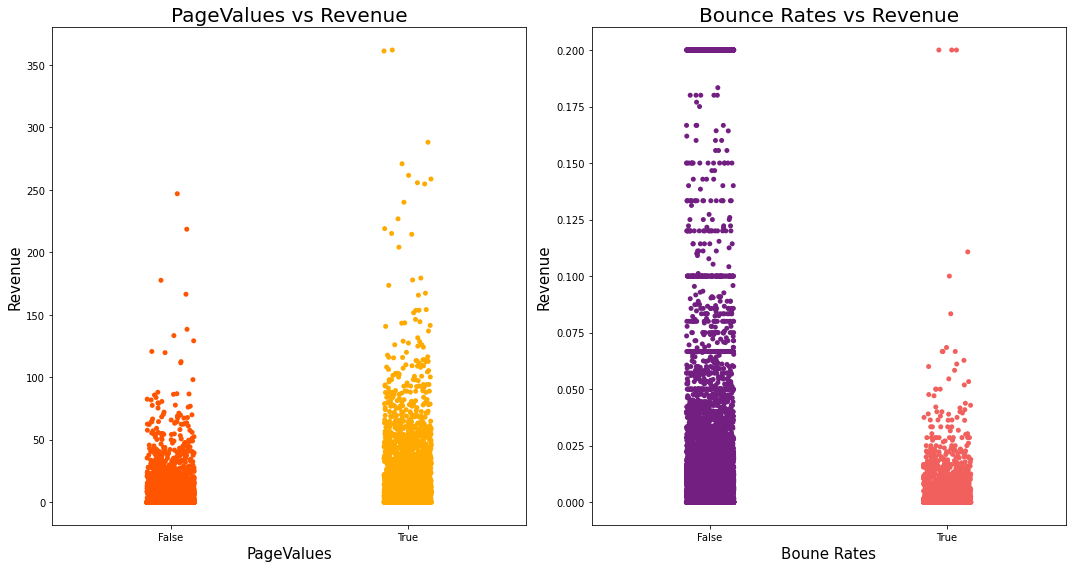

In [1519]:
# page values vs revenue

plt.subplot(1, 2, 1)
sns.stripplot(df['Revenue'], df['PageValues'], palette = 'autumn')
plt.title('PageValues vs Revenue', fontsize = 20)
plt.xlabel('PageValues', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)

# bounce rates vs revenue

plt.subplot(1, 2, 2)
sns.stripplot(df['Revenue'], df['BounceRates'], palette = 'magma')
plt.title('Bounce Rates vs Revenue', fontsize = 20)
plt.xlabel('Boune Rates', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)

plt.tight_layout()
plt.show()

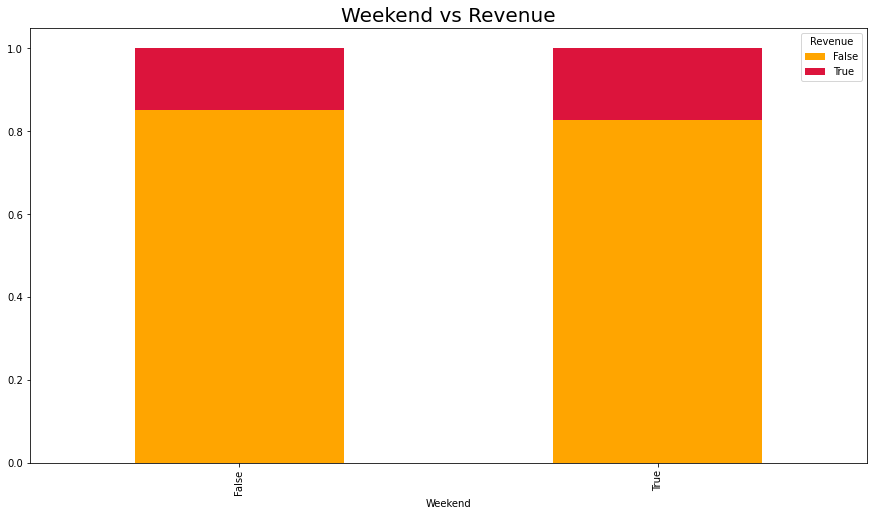

In [1520]:
# weekend vs Revenue

data_1 = pd.crosstab(df['Weekend'], df['Revenue'])
data_1.div(data_1.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, color = ['orange', 'crimson'])
plt.title('Weekend vs Revenue', fontsize = 20)
plt.show()

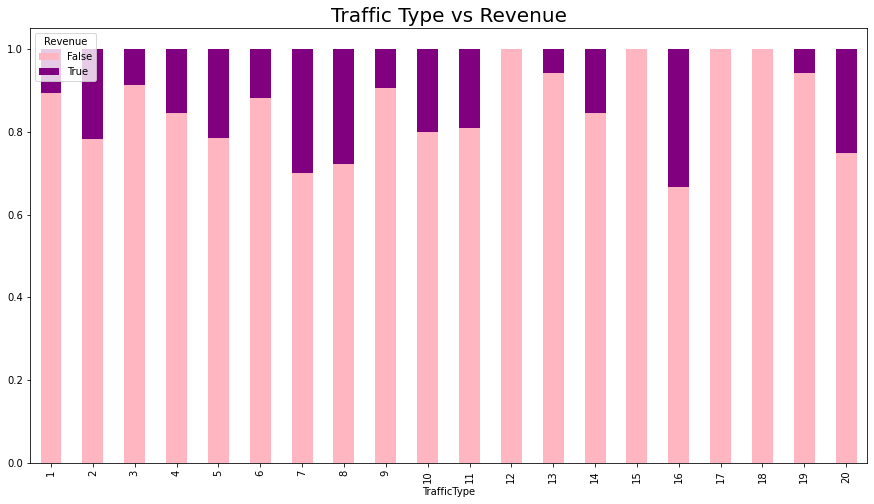

In [1521]:
# Traffic Type vs Revenue

data_1 = pd.crosstab(df['TrafficType'], df['Revenue'])
data_1.div(data_1.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, color = ['lightpink', 'purple'])
plt.title('Traffic Type vs Revenue', fontsize = 20)
plt.show()

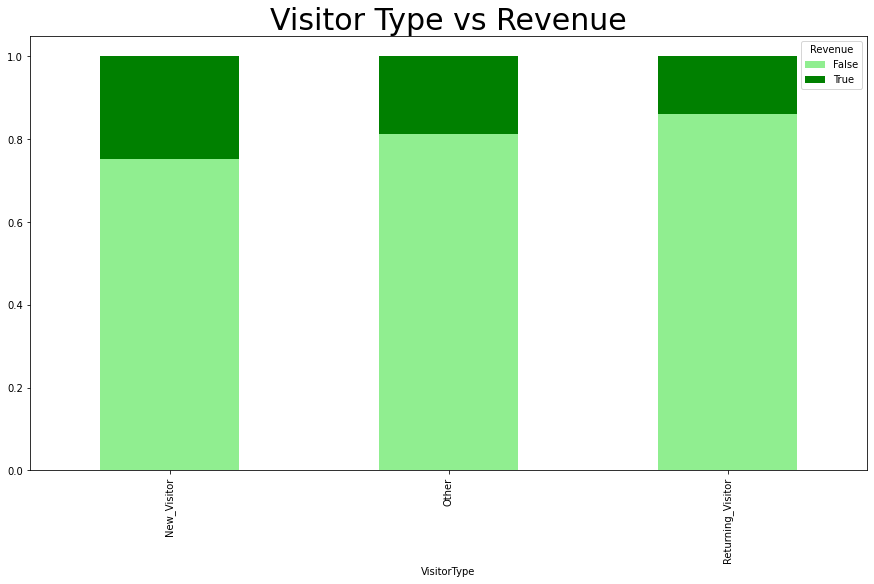

In [1522]:
# Visitor type vs revenue

data_1 = pd.crosstab(df['VisitorType'], df['Revenue'])
data_1.div(data_1.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, color = ['lightgreen', 'green'])
plt.title('Visitor Type vs Revenue', fontsize = 30)
plt.show()

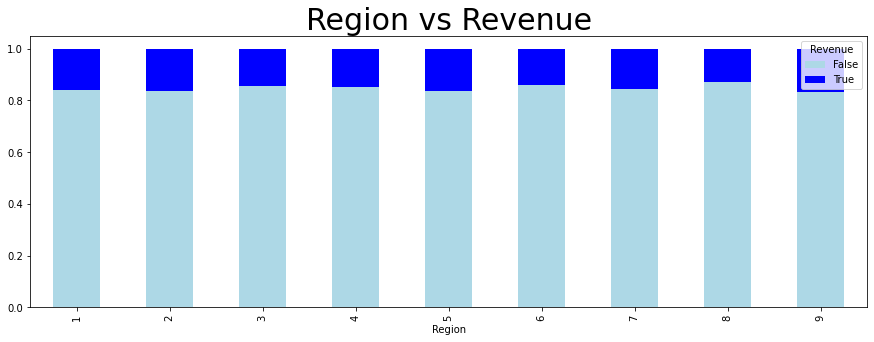

In [1523]:
# region vs Revenue

data_1 = pd.crosstab(df['Region'], df['Revenue'])
data_1.div(data_1.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 5), color = ['lightblue', 'blue'])
plt.title('Region vs Revenue', fontsize = 30)
plt.show()

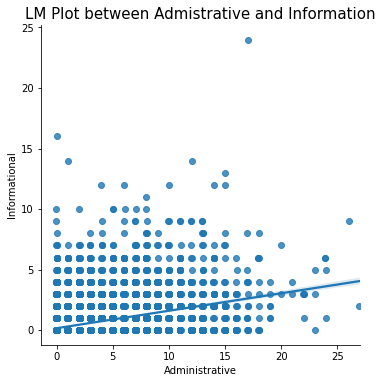

In [1524]:
# lm plot

sns.lmplot(x = 'Administrative', y = 'Informational', data = df, x_jitter = 0.05)
plt.title('LM Plot between Admistrative and Information', fontsize = 15)
plt.show()

### Multi-Variate Analysis

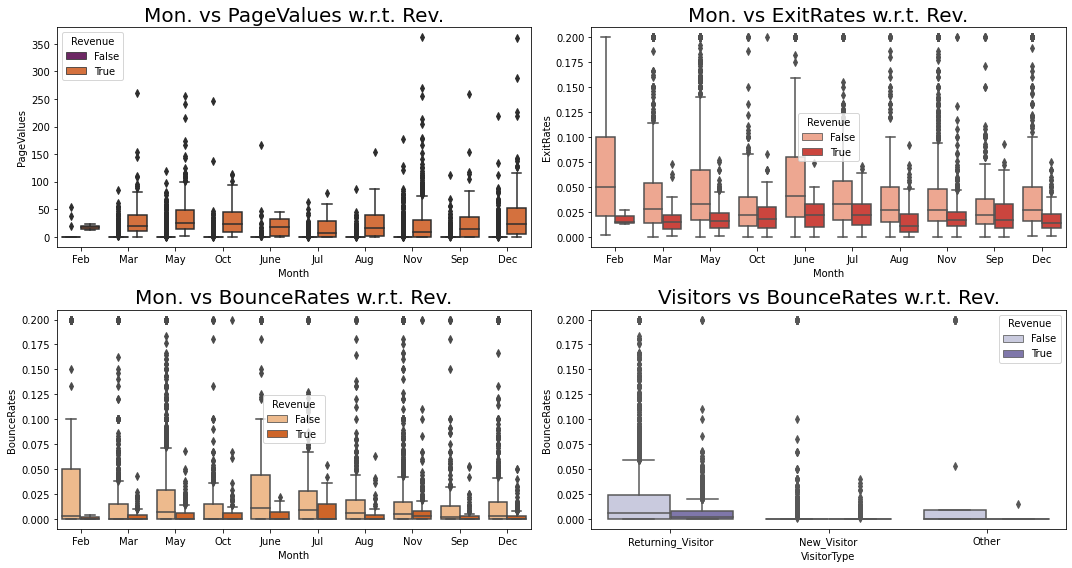

In [1525]:
# Month vs pagevalues wrt revenue

plt.subplot(2, 2, 1)
sns.boxplot(x = df['Month'], y = df['PageValues'], hue = df['Revenue'], palette = 'inferno')
plt.title('Mon. vs PageValues w.r.t. Rev.', fontsize = 20)

# Month vs exitrates wrt revenue

plt.subplot(2, 2, 2)
sns.boxplot(x = df['Month'], y = df['ExitRates'], hue = df['Revenue'], palette = 'Reds')
plt.title('Mon. vs ExitRates w.r.t. Rev.', fontsize = 20)

# Month vs bouncerates wrt revenue

plt.subplot(2, 2, 3)
sns.boxplot(x = df['Month'], y = df['BounceRates'], hue = df['Revenue'], palette = 'Oranges')
plt.title('Mon. vs BounceRates w.r.t. Rev.', fontsize = 20)

# Visitor type vs exit rates w.r.t revenue

plt.subplot(2, 2, 4)
sns.boxplot(x = df['VisitorType'], y = df['BounceRates'], hue = df['Revenue'], palette = 'Purples')
plt.title('Visitors vs BounceRates w.r.t. Rev.', fontsize = 20)

plt.tight_layout()
plt.show()

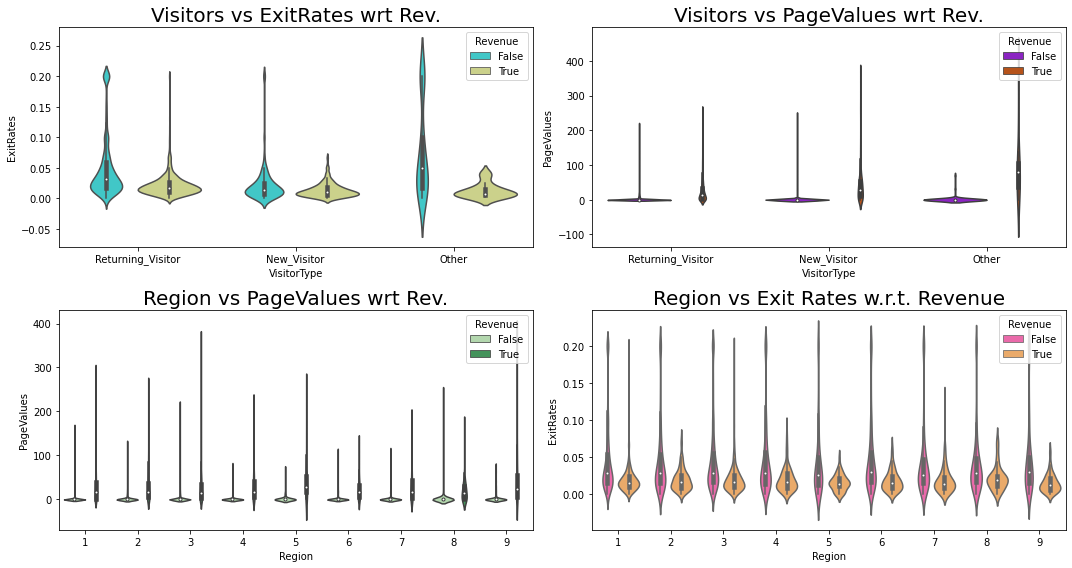

In [1526]:
# Visitor type vs exit rates w.r.t revenue

plt.subplot(2, 2, 1)
sns.violinplot(x = df['VisitorType'], y = df['ExitRates'], hue = df['Revenue'], palette = 'rainbow')
plt.title('Visitors vs ExitRates wrt Rev.', fontsize = 20)

# Visitor type vs exit rates w.r.t revenue

plt.subplot(2, 2, 2)
sns.violinplot(x = df['VisitorType'], y = df['PageValues'], hue = df['Revenue'], palette = 'gnuplot')
plt.title('Visitors vs PageValues wrt Rev.', fontsize = 20)

# Region vs pagevalues w.r.t. revenue

plt.subplot(2, 2, 3)
sns.violinplot(x = df['Region'], y = df['PageValues'], hue = df['Revenue'], palette = 'Greens')
plt.title('Region vs PageValues wrt Rev.', fontsize = 20)

#Region vs exit rates w.r.t. revenue

plt.subplot(2, 2, 4)
sns.violinplot(x = df['Region'], y = df['ExitRates'], hue = df['Revenue'], palette = 'spring')
plt.title('Region vs Exit Rates w.r.t. Revenue', fontsize = 20)

plt.tight_layout()
plt.show()

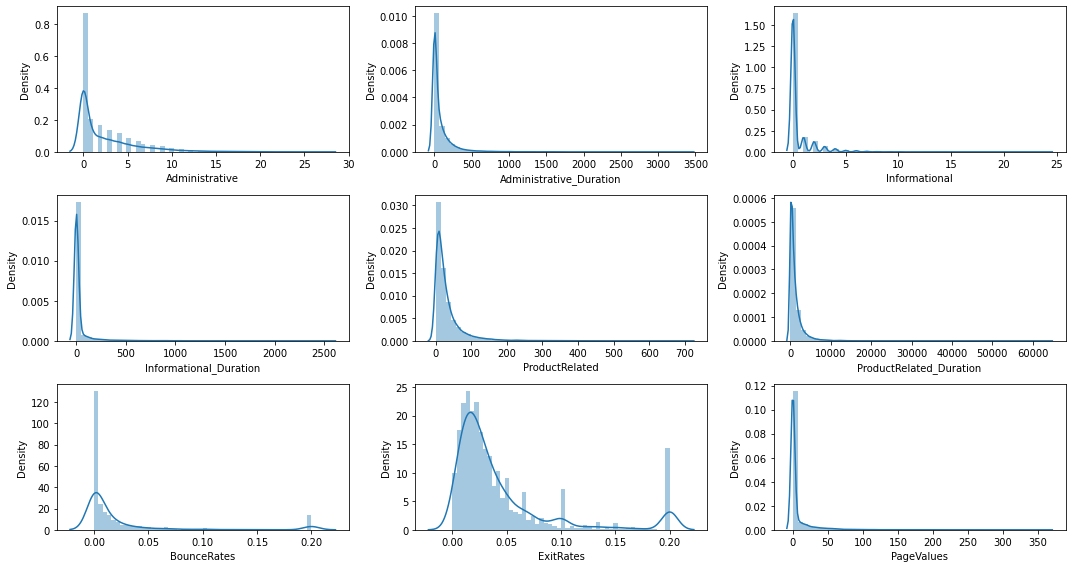

In [1527]:
# Distribution plots of continuous numerical variables

for i in range(1,10):
    plt.subplot(3,3,i)
    sns.distplot(a=df[df.columns[i-1]])
    
plt.tight_layout()   
plt.show()

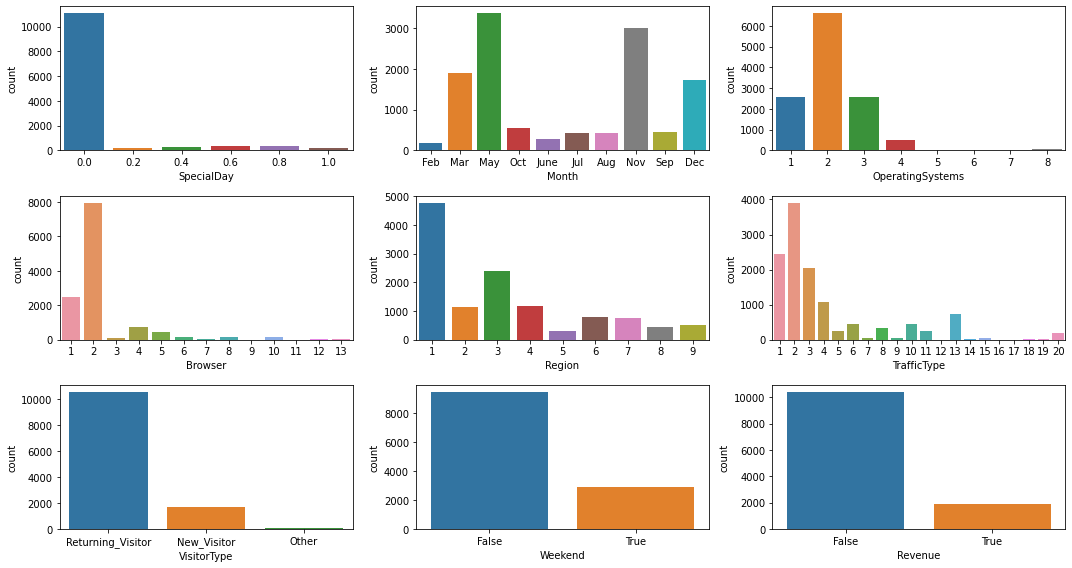

In [1528]:
# countplot of categorical columns

for i in range(10,19):
    plt.subplot(3,3,i-9)
    sns.countplot(x=df.columns[i-1],data=df)
    

plt.tight_layout()   
plt.show()

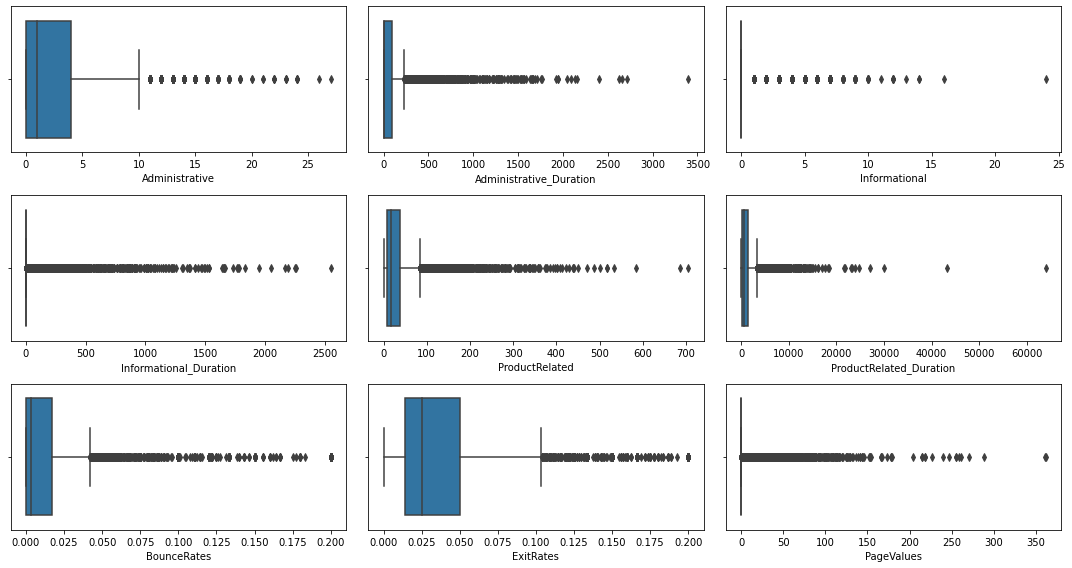

In [1529]:
# Box plots of continuous numerical variables

for i in range(1,10):
    plt.subplot(3,3,i)
    sns.boxplot(x=df[df.columns[i-1]])
    

plt.tight_layout()   
plt.show()

In [1530]:
# removing outliers based on boxplots of continuos numerical variables shown above

a=df[df['Administrative']<25]

a=a[a['Administrative_Duration']<3000]

a=a[a['Informational']<20]

a=a[a['Informational_Duration']<2500]

a=a[a['ProductRelated']<650]

a=a[a['ProductRelated_Duration']<40000]

a=a[a['PageValues']<350]

In [1531]:
df1=a.copy()

In [1532]:
df1.shape

(12323, 18)

In [1533]:
df1['Weekend']=df1['Weekend'].replace({False:0,True:1})
df1['Revenue']=df1['Revenue'].replace({False:0,True:1})

In [1534]:
df1.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.000000,0,0.000000,1,0.000000,0.200000,0.200000,0.000000,0.000000,Feb,1,1,1,1,Returning_Visitor,0,0
1,0,0.000000,0,0.000000,2,64.000000,0.000000,0.100000,0.000000,0.000000,Feb,2,2,1,2,Returning_Visitor,0,0
2,0,0.000000,0,0.000000,1,0.000000,0.200000,0.200000,0.000000,0.000000,Feb,4,1,9,3,Returning_Visitor,0,0
3,0,0.000000,0,0.000000,2,2.666667,0.050000,0.140000,0.000000,0.000000,Feb,3,2,2,4,Returning_Visitor,0,0
4,0,0.000000,0,0.000000,10,627.500000,0.020000,0.050000,0.000000,0.000000,Feb,3,3,1,4,Returning_Visitor,1,0


In [1535]:
label=LabelEncoder()
df1['Month']=pd.DataFrame(label.fit_transform(df1['Month']))
df1['VisitorType']=pd.DataFrame(label.fit_transform(df1['VisitorType']))
df1.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.000000,0,0.000000,1,0.000000,0.200000,0.200000,0.000000,0.000000,2.000000,1,1,1,1,2.000000,0,0
1,0,0.000000,0,0.000000,2,64.000000,0.000000,0.100000,0.000000,0.000000,2.000000,2,2,1,2,2.000000,0,0
2,0,0.000000,0,0.000000,1,0.000000,0.200000,0.200000,0.000000,0.000000,2.000000,4,1,9,3,2.000000,0,0
3,0,0.000000,0,0.000000,2,2.666667,0.050000,0.140000,0.000000,0.000000,2.000000,3,2,2,4,2.000000,0,0
4,0,0.000000,0,0.000000,10,627.500000,0.020000,0.050000,0.000000,0.000000,2.000000,3,3,1,4,2.000000,1,0


In [1536]:
df1['Month'].value_counts()

6.000000    3362
7.000000    2994
5.000000    1907
1.000000    1721
8.000000     548
9.000000     448
0.000000     432
3.000000     432
4.000000     288
2.000000     184
Name: Month, dtype: int64

In [1537]:
df1['VisitorType'].value_counts()

2.000000    10540
0.000000     1693
1.000000       83
Name: VisitorType, dtype: int64

In [1538]:
df_num=df1.iloc[:,0:9]
df_cat=df1.iloc[:,9:17]

In [1539]:
df_num.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues
0,0,0.000000,0,0.000000,1,0.000000,0.200000,0.200000,0.000000
1,0,0.000000,0,0.000000,2,64.000000,0.000000,0.100000,0.000000
2,0,0.000000,0,0.000000,1,0.000000,0.200000,0.200000,0.000000
3,0,0.000000,0,0.000000,2,2.666667,0.050000,0.140000,0.000000
4,0,0.000000,0,0.000000,10,627.500000,0.020000,0.050000,0.000000


In [1540]:
df_cat.head()

,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0.000000,2.000000,1,1,1,1,2.000000,0
1,0.000000,2.000000,2,2,1,2,2.000000,0
2,0.000000,2.000000,4,1,9,3,2.000000,0
3,0.000000,2.000000,3,2,2,4,2.000000,0
4,0.000000,2.000000,3,3,1,4,2.000000,1


In [1541]:
df_target=df1['Revenue']
df_target.head()

0    0
1    0
2    0
3    0
4    0
Name: Revenue, dtype: int64

In [1542]:
# Dropping columns which are not required for further analysis

df_cat.drop(['Month', 'OperatingSystems', 'Browser', 'Region',
       'TrafficType'],axis=1,inplace=True)

In [1543]:
df_cat.head()

,SpecialDay,VisitorType,Weekend
0,0.000000,2.000000,0
1,0.000000,2.000000,0
2,0.000000,2.000000,0
3,0.000000,2.000000,0
4,0.000000,2.000000,1


In [1544]:
df_target.value_counts()

0    10418
1     1905
Name: Revenue, dtype: int64

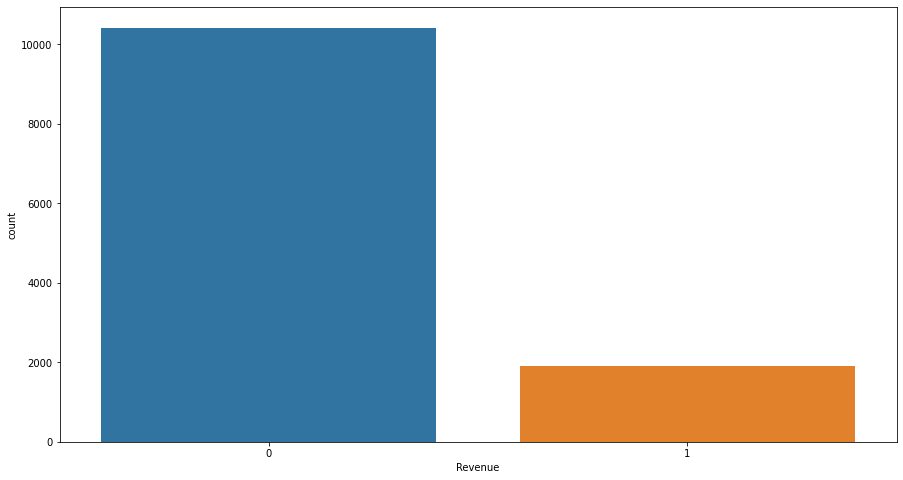

In [1545]:
sns.countplot(x=df_target)
plt.show()

In [1546]:
df_num.skew()

Administrative            1.919913
Administrative_Duration   5.196738
Informational             3.680801
Informational_Duration    7.359186
ProductRelated            3.916630
ProductRelated_Duration   4.185821
BounceRates               2.946787
ExitRates                 2.147980
PageValues                5.758295
dtype: float64

In [1547]:
df_num=np.sqrt(df_num)

In [1548]:
df_num.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues
0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.447214,0.447214,0.000000
1,0.000000,0.000000,0.000000,0.000000,1.414214,8.000000,0.000000,0.316228,0.000000
2,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.447214,0.447214,0.000000
3,0.000000,0.000000,0.000000,0.000000,1.414214,1.632993,0.223607,0.374166,0.000000
4,0.000000,0.000000,0.000000,0.000000,3.162278,25.049950,0.141421,0.223607,0.000000


In [1549]:
df_num.skew()

Administrative            0.634989
Administrative_Duration   1.501514
Informational             1.933272
Informational_Duration    3.411148
ProductRelated            1.428546
ProductRelated_Duration   1.235437
BounceRates               1.680835
ExitRates                 1.207453
PageValues                2.490413
dtype: float64

In [1550]:
ss=StandardScaler()
df_num=pd.DataFrame(ss.fit_transform(df_num),columns=df_num.columns)
df_num.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues
0,-0.924497,-0.791032,-0.486735,-0.385898,-1.291145,-1.392049,3.001222,2.716513,-0.452822
1,-0.924497,-0.791032,-0.486735,-0.385898,-1.149962,-0.993202,-0.749358,1.367360,-0.452822
2,-0.924497,-0.791032,-0.486735,-0.385898,-1.291145,-1.392049,3.001222,2.716513,-0.452822
3,-0.924497,-0.791032,-0.486735,-0.385898,-1.149962,-1.310635,1.125932,1.964121,-0.452822
4,-0.924497,-0.791032,-0.486735,-0.385898,-0.554138,-0.143161,0.436680,0.413365,-0.452822


In [1551]:
df_new=pd.concat([df_num,df_cat],axis=1)
df_new.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,VisitorType,Weekend
0,-0.924497,-0.791032,-0.486735,-0.385898,-1.291145,-1.392049,3.001222,2.716513,-0.452822,0.000000,2.000000,0.000000
1,-0.924497,-0.791032,-0.486735,-0.385898,-1.149962,-0.993202,-0.749358,1.367360,-0.452822,0.000000,2.000000,0.000000
2,-0.924497,-0.791032,-0.486735,-0.385898,-1.291145,-1.392049,3.001222,2.716513,-0.452822,0.000000,2.000000,0.000000
3,-0.924497,-0.791032,-0.486735,-0.385898,-1.149962,-1.310635,1.125932,1.964121,-0.452822,0.000000,2.000000,0.000000
4,-0.924497,-0.791032,-0.486735,-0.385898,-0.554138,-0.143161,0.436680,0.413365,-0.452822,0.000000,2.000000,1.000000


In [1552]:
# let's cluster Administrative duration and Bounce Rate to different types of clusters in the dataset.

x = df_new.iloc[:, [1, 6]]

# checking the shape of the dataset
x.shape

(12330, 2)

In [1553]:
x=x.dropna()
x

,Administrative_Duration,BounceRates
0,-0.791032,3.001222
1,-0.791032,-0.749358
2,-0.791032,3.001222
3,-0.791032,1.125932
4,-0.791032,0.436680
...,...,...
12318,0.923830,-0.040565
12319,-0.791032,-0.749358
12320,-0.791032,1.671631
12321,0.442288,-0.749358


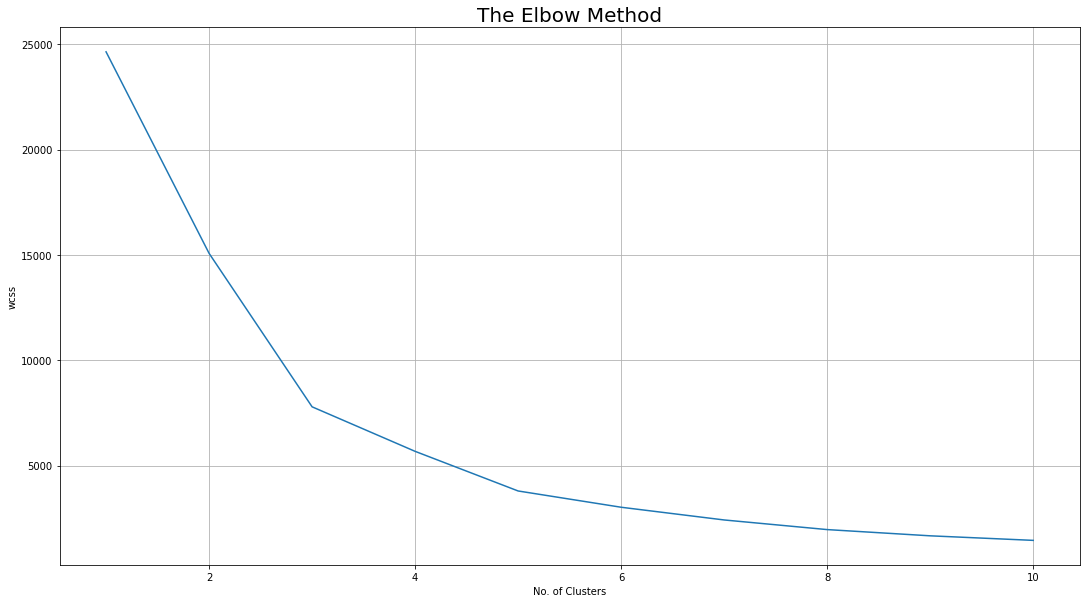

In [1554]:
wcss = []
for i in range(1, 11):
    km1 = KMeans(n_clusters = i,
              init = 'k-means++',
              max_iter = 300,
              n_init = 10,
              random_state = 0,
              algorithm = 'elkan',
              tol = 0.001)
    km1.fit(x)
    labels = km1.labels_
    wcss.append(km1.inertia_)

plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

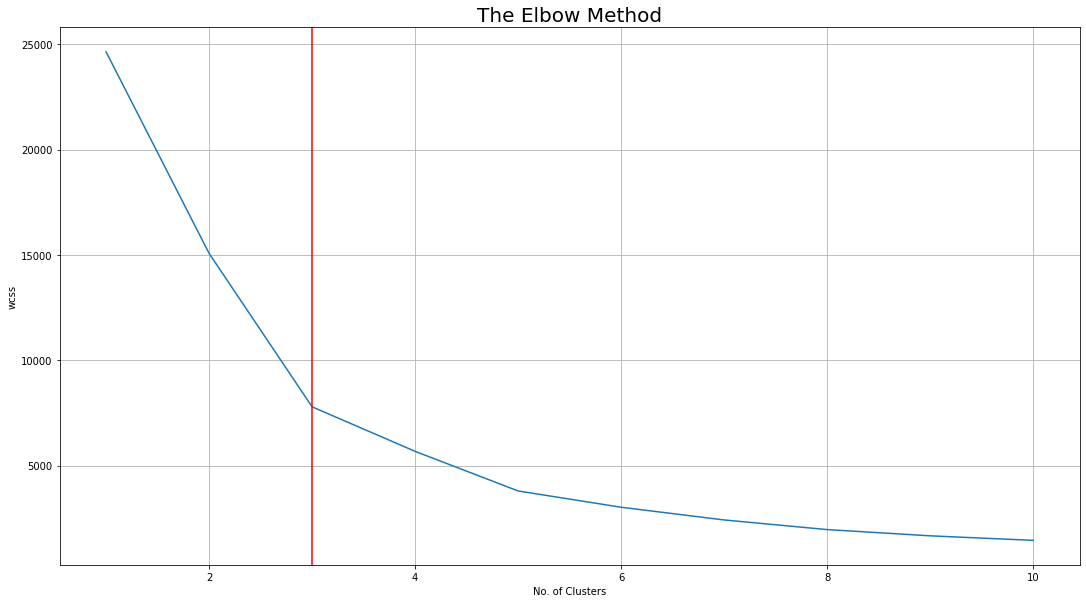

In [1555]:
wcss = []
for i in range(1, 11):
    km1 = KMeans(n_clusters = i,
              init = 'k-means++',
              max_iter = 300,
              n_init = 10,
              random_state = 0,
              algorithm = 'elkan',
              tol = 0.001)
    km1.fit(x)
    labels = km1.labels_
    wcss.append(km1.inertia_)

plt.plot(range(1, 11), wcss)
plt.axvline(x = 3, color = 'red')
plt.grid()
plt.tight_layout()
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

According to this plot, the maximum bend is at third index, that is the number of Optimal no. of Clusters for Adminstrative Duration and Revenue is Three. 

#### Visualizing the Cluster using Scatter Plot.

In [1556]:
x.values

array([[-0.79103236,  3.00122165],
       [-0.79103236, -0.74935751],
       [-0.79103236,  3.00122165],
       ...,
       [-0.79103236,  1.67163092],
       [ 0.44228822, -0.74935751],
       [-0.79103236, -0.74935751]])

In [1557]:
x=np.array(x)

In [1558]:
km1 = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km1.fit_predict(x)

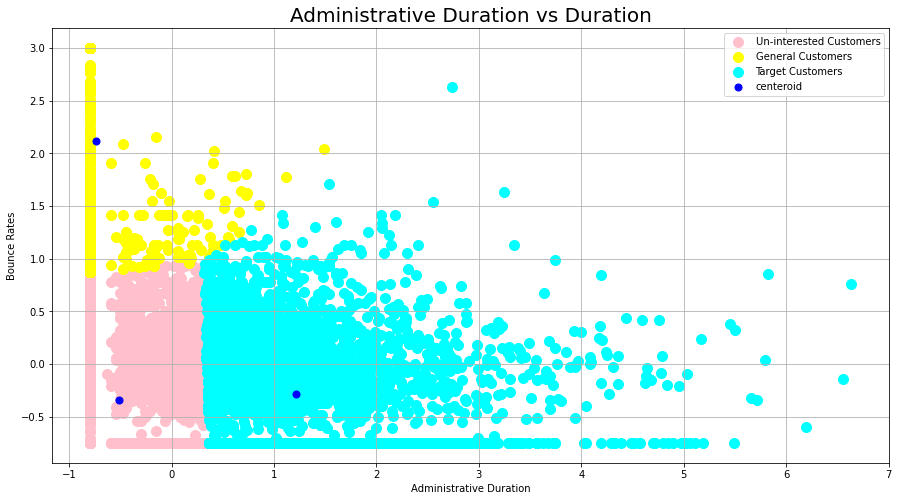

In [1559]:
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'Un-interested Customers')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'General Customers')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'cyan', label = 'Target Customers')
plt.scatter(km1.cluster_centers_[:,0], km1.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.title('Administrative Duration vs Duration', fontsize = 20)
plt.grid()
plt.xlabel('Administrative Duration')
plt.ylabel('Bounce Rates')
plt.legend()
plt.show()

In [1560]:
# informational duration vs Bounce Rates

z = df_new.iloc[:, [3, 6]]

In [1561]:
z=z.dropna()
z

,Informational_Duration,BounceRates
0,-0.385898,3.001222
1,-0.385898,-0.749358
2,-0.385898,3.001222
3,-0.385898,1.125932
4,-0.385898,0.436680
...,...,...
12318,-0.385898,-0.040565
12319,-0.385898,-0.749358
12320,-0.385898,1.671631
12321,-0.385898,-0.749358


In [1562]:
z=np.array(z)

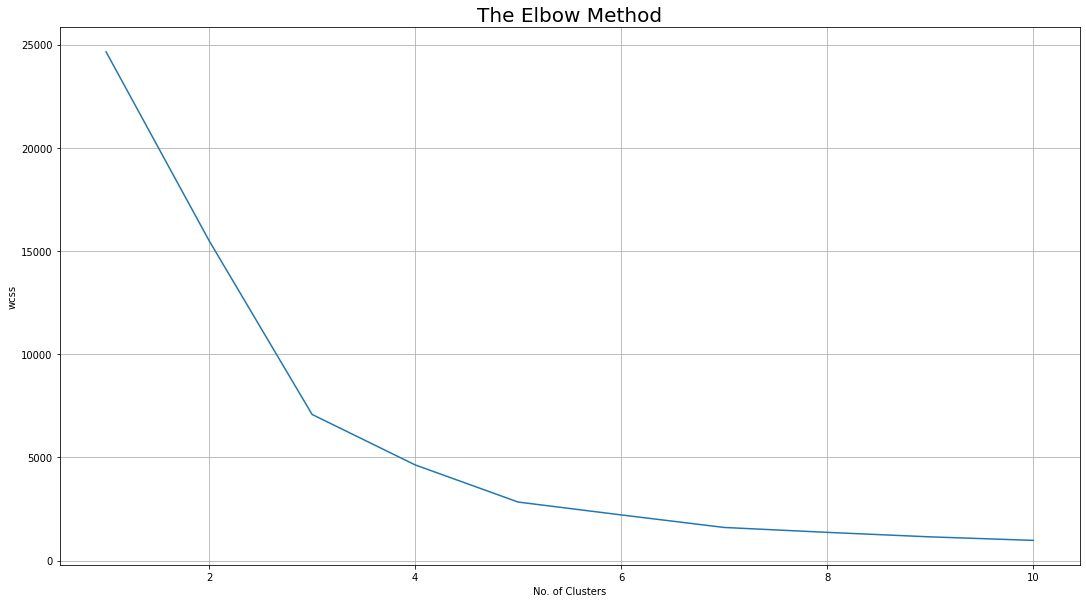

In [1563]:
wcss = []
for i in range(1, 11):
    km2 = KMeans(n_clusters = i,
              init = 'k-means++',
              max_iter = 300,
              n_init = 10,
              random_state = 0,
              algorithm = 'elkan',
              tol = 0.001)
    km2.fit(z)
    labels = km2.labels_
    wcss.append(km2.inertia_)

plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

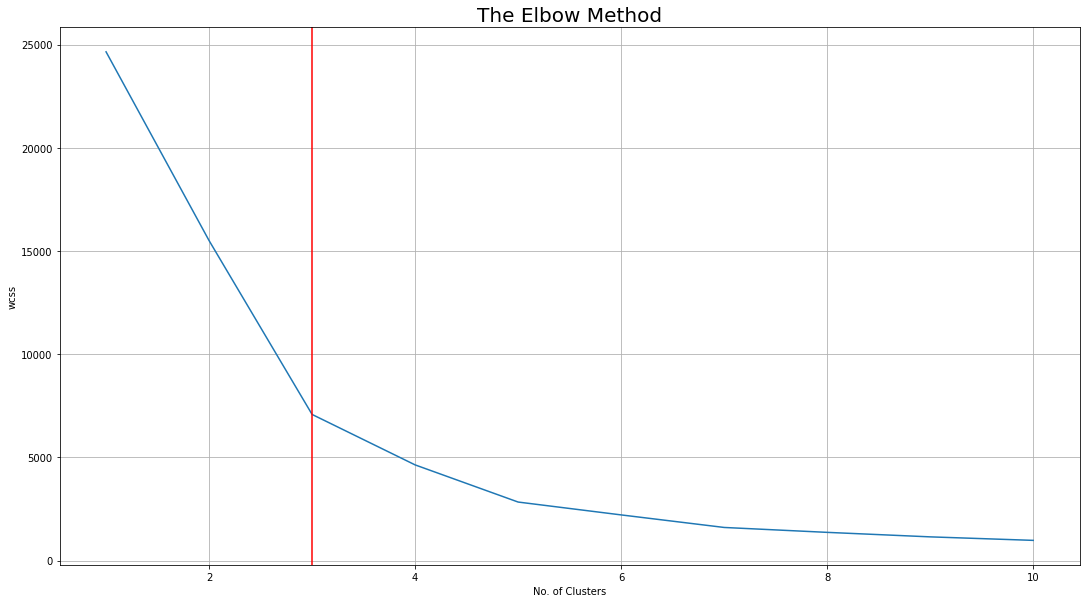

In [1564]:
wcss = []
for i in range(1, 11):
    km2 = KMeans(n_clusters = i,
              init = 'k-means++',
              max_iter = 300,
              n_init = 10,
              random_state = 0,
              algorithm = 'elkan',
              tol = 0.001)
    km2.fit(z)
    labels = km2.labels_
    wcss.append(km2.inertia_)

plt.plot(range(1, 11), wcss)
plt.axvline(x = 3, color = 'red')
plt.grid()
plt.tight_layout()
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

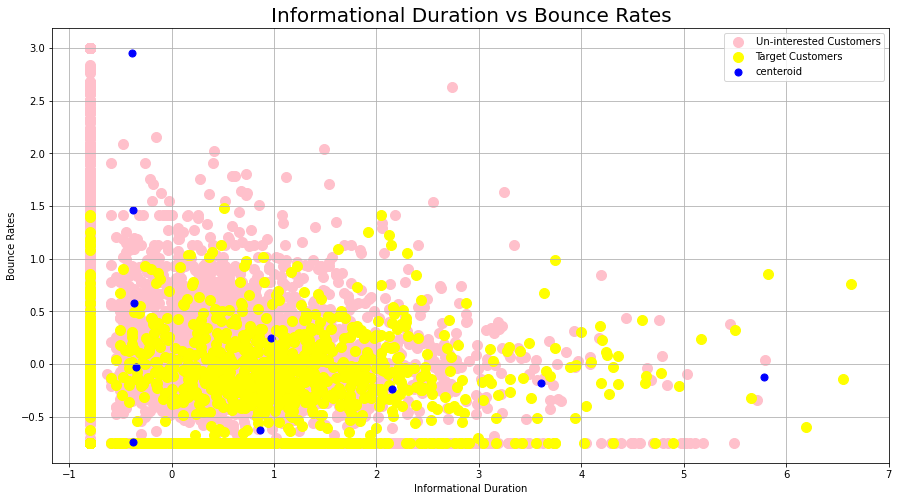

In [1565]:
km2 = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km2.fit_predict(z)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'Un-interested Customers')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'Target Customers')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.title('Informational Duration vs Bounce Rates', fontsize = 20)
plt.grid()
plt.xlabel('Informational Duration')
plt.ylabel('Bounce Rates')
plt.legend()
plt.show()

In [1566]:
# informational duration vs Bounce Rates
b = df_new.iloc[:, [1, 7]]

In [1567]:
b=b.dropna()
b

,Administrative_Duration,ExitRates
0,-0.791032,2.716513
1,-0.791032,1.367360
2,-0.791032,2.716513
3,-0.791032,1.964121
4,-0.791032,0.413365
...,...,...
12318,0.923830,-0.134832
12319,-0.791032,-0.385373
12320,-0.791032,1.142452
12321,0.442288,-0.395303


In [1568]:
b=np.array(b)

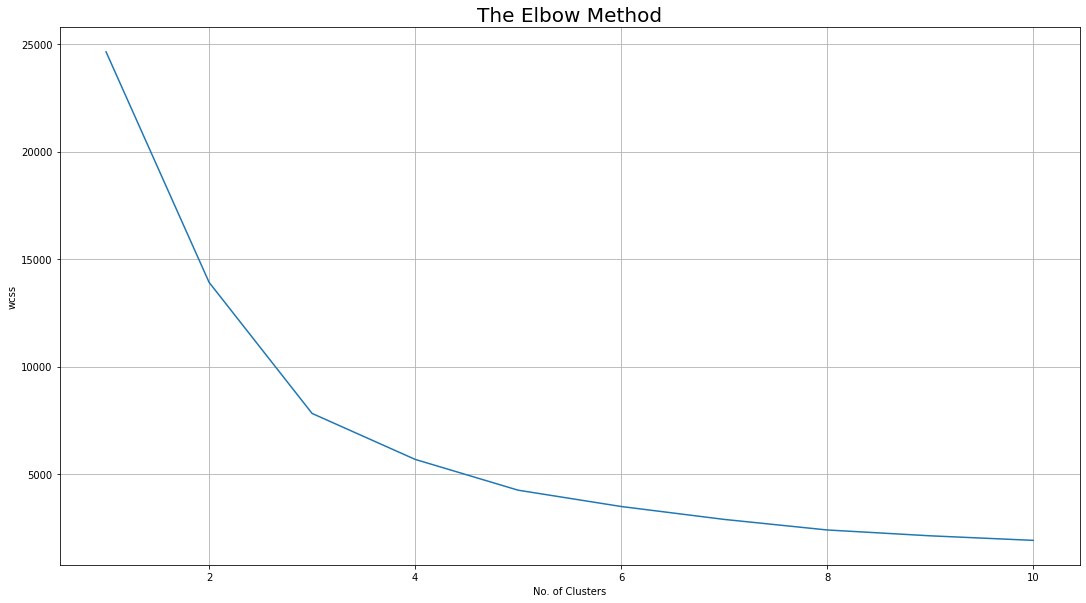

In [1569]:
wcss = []
for i in range(1, 11):
    km3 = KMeans(n_clusters = i,
              init = 'k-means++',
              max_iter = 300,
              n_init = 10,
              random_state = 0,
              algorithm = 'elkan',
              tol = 0.001)
    km3.fit(b)
    labels = km3.labels_
    wcss.append(km3.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

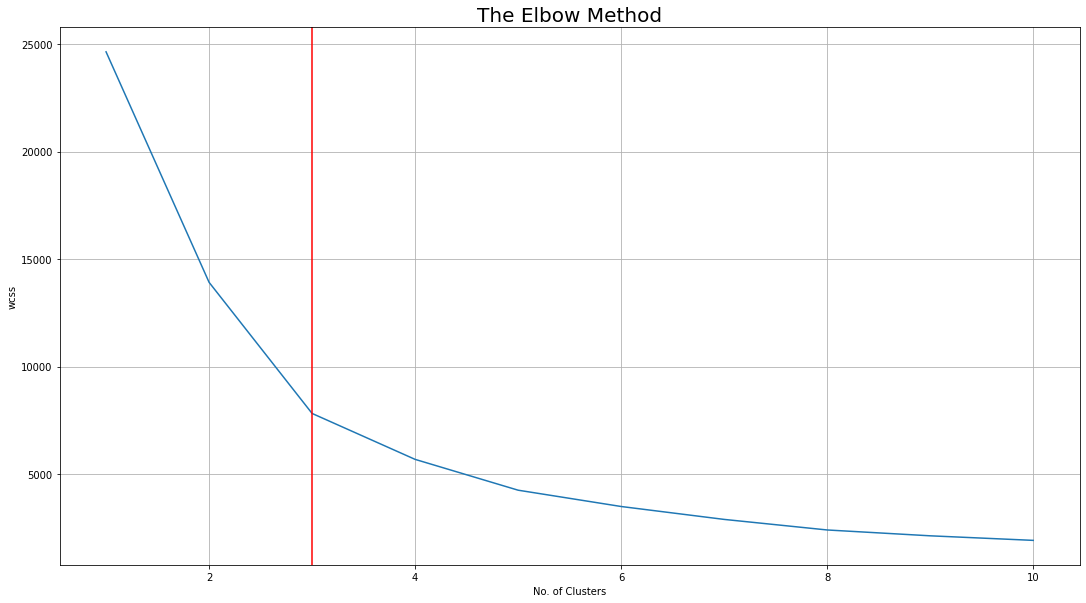

In [1570]:
wcss = []
for i in range(1, 11):
    km3 = KMeans(n_clusters = i,
              init = 'k-means++',
              max_iter = 300,
              n_init = 10,
              random_state = 0,
              algorithm = 'elkan',
              tol = 0.001)
    km3.fit(b)
    labels = km3.labels_
    wcss.append(km3.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.axvline(x = 3, color = 'red')
plt.grid()
plt.tight_layout()
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

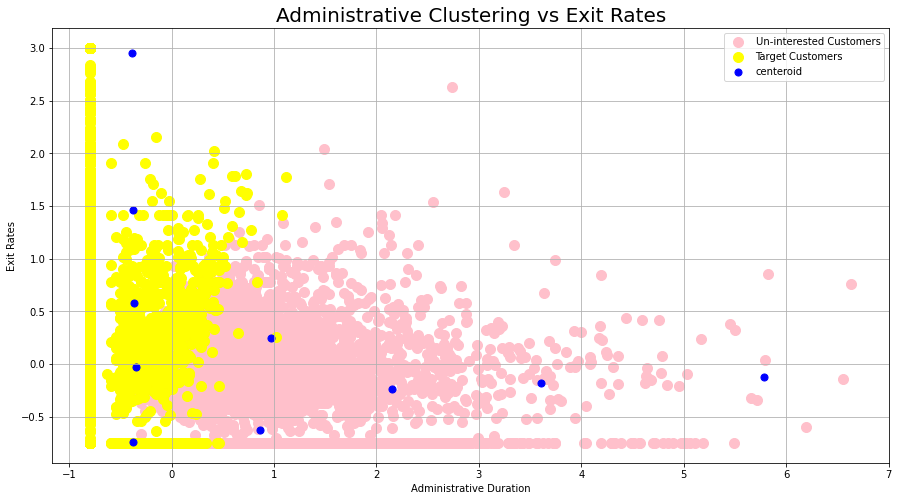

In [1571]:
km3 = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km3.fit_predict(b)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'Un-interested Customers')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'Target Customers')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.title('Administrative Clustering vs Exit Rates', fontsize = 20)
plt.grid()
plt.xlabel('Administrative Duration')
plt.ylabel('Exit Rates')
plt.legend()
plt.show()

In [1573]:
df_new=df_new.dropna()